In [79]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Resizing, Rescaling, RandomFlip, RandomRotation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from PIL import Image

In [80]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
SAVE_PATH = r"C:\Users\yenul\OneDrive\Desktop\DSGP project yoga\Processed_Dataset"
TRAIN_SAVE_PATH = os.path.join(SAVE_PATH, "train")
TEST_SAVE_PATH = os.path.join(SAVE_PATH, "test")

os.makedirs(TRAIN_SAVE_PATH, exist_ok=True)
os.makedirs(TEST_SAVE_PATH, exist_ok=True)


In [81]:
dataset_path = r"C:\Users\yenul\OneDrive\Desktop\DSGP project yoga\Dataset DSGP"

In [82]:
# Split into train and test
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

test_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 10668 files belonging to 8 classes.
Using 8535 files for training.
Found 10668 files belonging to 8 classes.
Using 2133 files for validation.


In [83]:
# Get class names (pose names)
class_names = training_set.class_names
print("Classes:", class_names)

# Create folders for each class
for class_name in class_names:
    os.makedirs(os.path.join(TRAIN_SAVE_PATH, class_name), exist_ok=True)
    os.makedirs(os.path.join(TEST_SAVE_PATH, class_name), exist_ok=True)


Classes: ['Adho Mukha Svanasana', 'Anjaneyasana', 'Phalakasana', 'Setu Bandha Sarvangasana', 'Trikonasana', 'Utkatasana', 'Virabhadrasana Two', 'Vrksasana']


In [84]:
# Normalization and Augmentation
resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [85]:
# Apply augmentation to training set, then normalize
training_set = training_set.map(lambda x, y: (resize_and_rescale(data_augmentation(x)), y))
# Only normalize the test set (no augmentation)
test_set = test_set.map(lambda x, y: (resize_and_rescale(x), y)) 


In [86]:
# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
training_set = training_set.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)


In [87]:
# Function to save images to respective folders
def save_images(dataset, save_path):
    for image_batch, label_batch in dataset:
        for i in range(image_batch.shape[0]):
            img = image_batch[i].numpy() * 255  # Convert back to [0, 255]
            img = img.astype("uint8")
            img_pil = Image.fromarray(img)
            
            class_label = class_names[label_batch[i].numpy()]
            class_folder = os.path.join(save_path, class_label)
            img_filename = os.path.join(class_folder, f"{np.random.randint(100000)}.jpg")
            img_pil.save(img_filename)

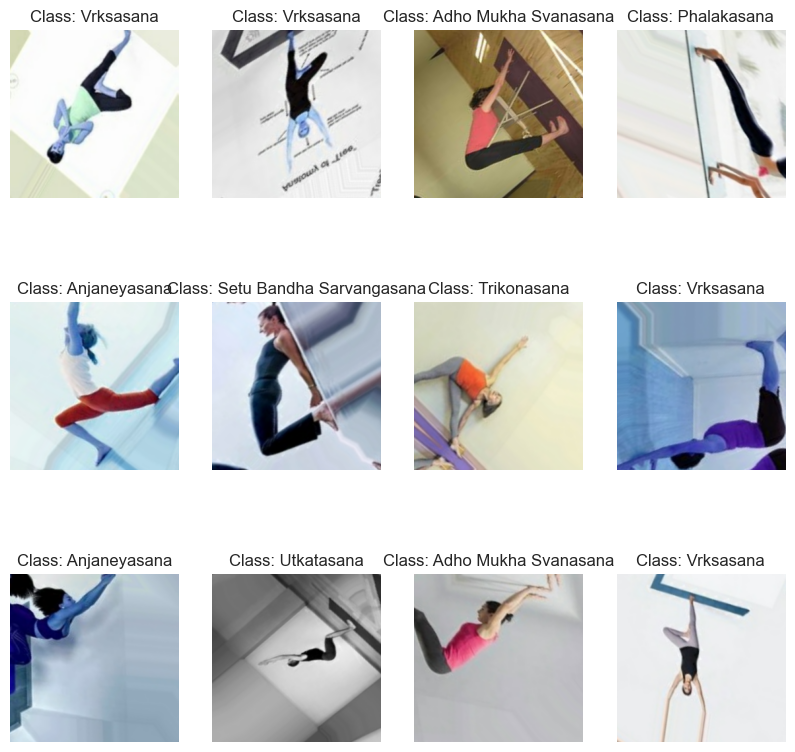

In [88]:
# Plotting a batch of augmented training images
plt.figure(figsize=(10, 10))
for image_batch, label_batch in training_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        img = image_batch[i].numpy() * 255  # Convert back to [0, 255] range
        img = img.astype("uint8")
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

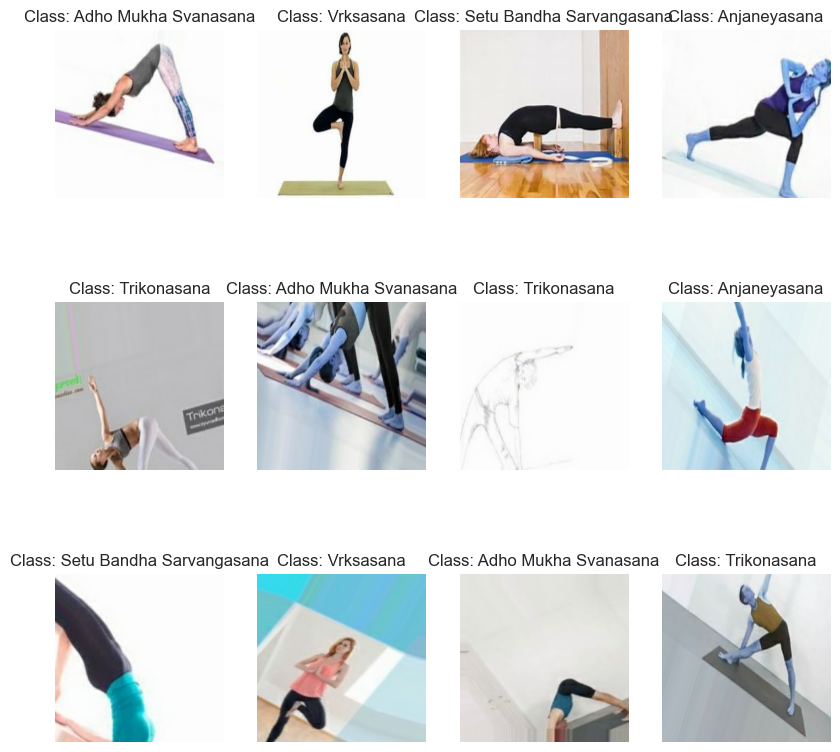

In [89]:
# Plotting a batch of test images (without augmentation)
plt.figure(figsize=(10, 10))
for image_batch, label_batch in test_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        img = image_batch[i].numpy() * 255
        img = img.astype("uint8")
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

In [90]:
# Save images
print("Saving training images...")
save_images(training_set, TRAIN_SAVE_PATH)
print("Training images saved successfully.")

print("Saving test images...")
save_images(test_set, TEST_SAVE_PATH)
print("Test images saved successfully.")

print("Dataset preprocessing and saving completed.")

Saving training images...
Training images saved successfully.
Saving test images...
Test images saved successfully.
Dataset preprocessing and saving completed.


In [91]:
### END